In [19]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [20]:
instance = "stndrd10"

In [21]:
df = dd.read_csv(f"../results/{instance}*.csv", sep=";")

In [22]:
df_mem = df.compute()
display(df_mem)

,nodes,arcs,algorithm,t0,tf,it,lambda,cost,total_time
0,300,6320,1,14867566.5,1000.0,15,0.79,148414513,58.673865
1,300,6320,1,49558555.0,1000.0,15,0.79,146849606,64.097135
2,300,6320,1,14867566.5,10000.0,15,0.79,147178231,42.978391
3,300,6320,1,49558555.0,10000.0,15,0.79,147756319,51.146189
4,300,6320,1,14867566.5,100000.0,15,0.79,148529659,30.523651
...,...,...,...,...,...,...,...,...,...
115,300,6320,2,49558555.0,1000.0,30,0.99,145474049,2733.236245
116,300,6320,2,14867566.5,10000.0,30,0.99,145418584,1842.998729
117,300,6320,2,49558555.0,10000.0,30,0.99,145567638,2150.074082
118,300,6320,2,14867566.5,100000.0,30,0.99,145419337,1266.334708


In [63]:
def concatenate(row):
    cols = ["algorithm", "t0", "tf", "it", "lambda"]
    x = [str(row[y]) for y in cols]
    response = {}
    response["setting"] = " ".join(x)
    response["algorithm"] = "Alg. 1" if row.algorithm == 1.0 else "Alg. 2"
    response["cost"] = row.cost
    response["total_time"] = row.total_time
    return pd.Series(response)

In [64]:
solutions = df_mem.apply(concatenate, axis=1)

In [65]:
display(solutions)

,setting,algorithm,cost,total_time
0,1.0 14867566.5 1000.0 15.0 0.79,Alg. 1,148414513.0,58.673865
1,1.0 49558555.0 1000.0 15.0 0.79,Alg. 1,146849606.0,64.097135
2,1.0 14867566.5 10000.0 15.0 0.79,Alg. 1,147178231.0,42.978391
3,1.0 49558555.0 10000.0 15.0 0.79,Alg. 1,147756319.0,51.146189
4,1.0 14867566.5 100000.0 15.0 0.79,Alg. 1,148529659.0,30.523651
...,...,...,...,...
115,2.0 49558555.0 1000.0 30.0 0.99,Alg. 2,145474049.0,2733.236245
116,2.0 14867566.5 10000.0 30.0 0.99,Alg. 2,145418584.0,1842.998729
117,2.0 49558555.0 10000.0 30.0 0.99,Alg. 2,145567638.0,2150.074082
118,2.0 14867566.5 100000.0 30.0 0.99,Alg. 2,145419337.0,1266.334708


In [66]:
def stats_by_configration(group):
    response = {}
    
    response["time_mean"] = group.total_time.mean()
    response["time_min"] = group.total_time.min()
    response["time_max"] = group.total_time.max()
    response["time_sd"] = group.total_time.std()
    response["time_median"] = group.total_time.median()
    
    response["cost_mean"] = group.cost.mean()
    response["cost_min"] = group.cost.min()
    response["cost_max"] = group.cost.max()
    response["cost_sd"] = group.cost.std()
    response["cost_median"] = group.cost.median()
    
    response["algorithm"] = group.algorithm.values[0]
    
    return pd.Series(response)

In [67]:
stats = solutions.groupby("setting").apply(stats_by_configration).reset_index()

In [68]:
display(stats)

,setting,time_mean,time_min,time_max,time_sd,time_median,cost_mean,cost_min,cost_max,cost_sd,cost_median,algorithm
0,1.0 14867566.5 1000.0 15.0 0.79,57.232766,45.659730,64.043749,4.221451,58.292791,1.474852e+08,145784684.0,148457656.0,6.905669e+05,147576571.5,Alg. 1
1,1.0 14867566.5 1000.0 15.0 0.84,74.547125,59.655538,86.553034,8.338297,79.276966,1.472313e+08,145765472.0,148414221.0,7.449594e+05,147315919.0,Alg. 1
2,1.0 14867566.5 1000.0 15.0 0.89,111.170492,86.704409,128.206190,11.187569,117.417615,1.470511e+08,145598299.0,148253835.0,7.098390e+05,147049632.5,Alg. 1
3,1.0 14867566.5 1000.0 15.0 0.94,210.741662,163.093850,241.852171,18.815442,219.731715,1.466360e+08,145639316.0,148023802.0,5.634667e+05,146693585.5,Alg. 1
4,1.0 14867566.5 1000.0 15.0 0.99,1337.370717,1202.219778,1634.256324,105.014501,1339.027184,1.458837e+08,145460109.0,146493801.0,2.688574e+05,145838074.5,Alg. 1
...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.0 49558555.0 100000.0 30.0 0.79,69.182501,53.769575,80.768018,7.050530,71.657849,1.468303e+08,145430635.0,148748975.0,1.041173e+06,146930148.0,Alg. 2
236,2.0 49558555.0 100000.0 30.0 0.84,91.717532,71.226470,106.170301,9.541993,95.063891,1.466231e+08,145418434.0,148736418.0,9.829358e+05,146282649.5,Alg. 2
237,2.0 49558555.0 100000.0 30.0 0.89,137.290210,105.424184,157.261230,14.272447,142.204410,1.462830e+08,145406167.0,148741268.0,8.147291e+05,145989781.5,Alg. 2
238,2.0 49558555.0 100000.0 30.0 0.94,257.970627,197.897269,298.849961,26.080924,270.653895,1.460899e+08,145412205.0,147863185.0,6.222564e+05,145918966.5,Alg. 2


# Get top 10 by mean cost and mean time

In [55]:
top_mean_cost = stats.sort_values(by=["cost_mean"], ascending=False)[0:10]
top_mean_cost_time = stats.sort_values(by=["time_mean"], ascending=True)[0:10]

In [56]:
top_mean_cost

,setting,time_mean,time_min,time_max,time_sd,time_median,cost_mean,cost_min,cost_max,cost_sd,cost_median,algorithm
40,1.0 14867566.5 100000.0 15.0 0.79,30.530817,24.163235,34.231644,2.321417,31.283537,1.482339e+08,145525877.0,149009359.0,694693.725619,148538736.0,1.0
100,1.0 49558555.0 100000.0 15.0 0.79,37.883818,34.733622,41.927555,1.550038,38.300027,1.482302e+08,146129796.0,148872895.0,702386.684019,148672714.0,1.0
101,1.0 49558555.0 100000.0 15.0 0.84,47.957334,38.451741,56.204852,5.202155,50.958749,1.481231e+08,145604594.0,148855642.0,834748.674431,148525715.5,1.0
46,1.0 14867566.5 100000.0 20.0 0.84,51.514071,41.122994,59.819703,5.503509,54.698827,1.480983e+08,146280465.0,148921673.0,749656.230115,148421372.0,1.0
41,1.0 14867566.5 100000.0 15.0 0.84,38.506838,30.844332,44.651496,4.251508,41.007270,1.480465e+08,145985684.0,148914034.0,787347.717813,148306469.0,1.0
50,1.0 14867566.5 100000.0 25.0 0.79,51.175320,39.606459,56.612217,3.784041,52.360810,1.480353e+08,145894444.0,148919595.0,823419.548622,148242521.0,1.0
45,1.0 14867566.5 100000.0 20.0 0.79,40.649252,36.701189,45.571419,2.138147,41.600389,1.479555e+08,145914854.0,148848229.0,849534.157870,148262868.0,1.0
42,1.0 14867566.5 100000.0 15.0 0.89,57.577461,44.990195,66.640665,5.773129,60.799864,1.479471e+08,145966463.0,148943104.0,883933.442174,148324548.5,1.0
105,1.0 49558555.0 100000.0 20.0 0.79,48.936722,39.007457,55.295906,4.417183,50.942801,1.479296e+08,145718041.0,148987353.0,878454.888753,148214103.5,1.0
47,1.0 14867566.5 100000.0 20.0 0.89,76.702299,59.834747,88.601937,7.675397,80.555482,1.478887e+08,145519989.0,149197921.0,890100.653841,148100006.5,1.0


In [57]:
top_costs = solutions[solutions.setting.isin(top_mean_cost.setting.values)]
top_costs_time = solutions[solutions.setting.isin(top_mean_cost_time.setting.values)]

In [58]:
top_mean_cost.iloc[0].cost_mean

148233927.02

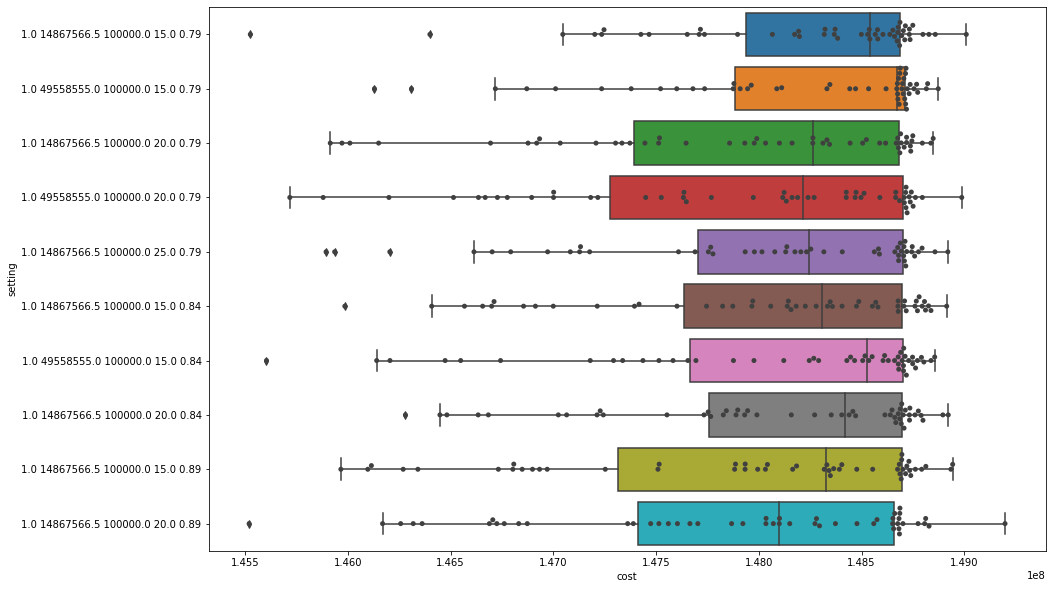

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x="cost", y="setting", data=top_costs)
ax = sns.swarmplot(x="cost", y="setting", data=top_costs, color=".25")

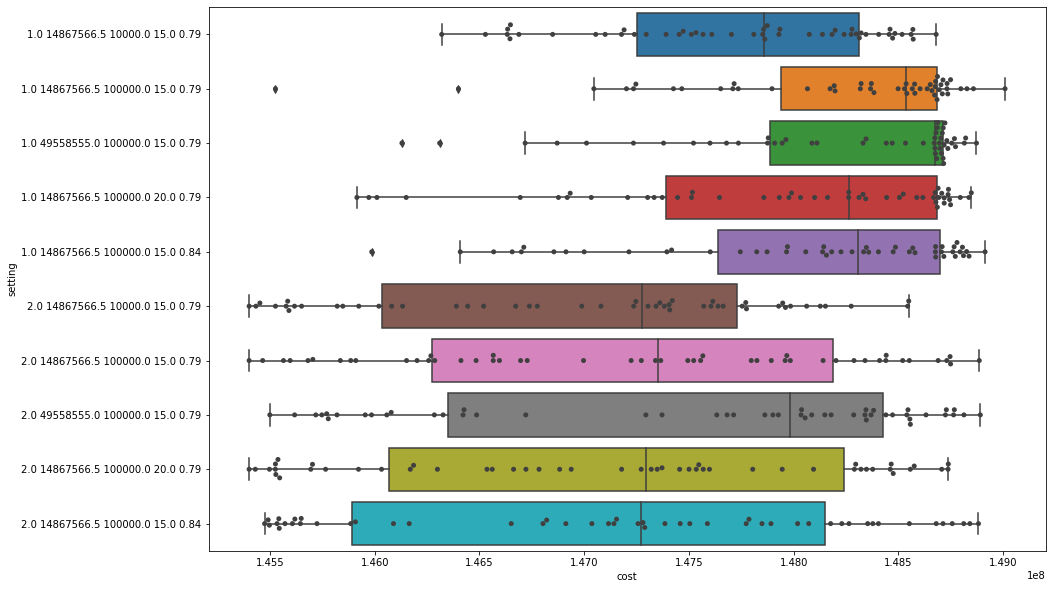

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x="cost", y="setting", data=top_costs_time)
ax = sns.swarmplot(x="cost", y="setting", data=top_costs_time, color=".25")

In [61]:
top_costs_time

,setting,algorithm,cost,total_time
2,1.0 14867566.5 10000.0 15.0 0.79,1.0,147178231.0,42.978391
4,1.0 14867566.5 100000.0 15.0 0.79,1.0,148529659.0,30.523651
5,1.0 49558555.0 100000.0 15.0 0.79,1.0,147945360.0,38.116045
10,1.0 14867566.5 100000.0 20.0 0.79,1.0,148744623.0,40.388830
28,1.0 14867566.5 100000.0 15.0 0.84,1.0,148806021.0,40.686938
...,...,...,...,...
2,2.0 14867566.5 10000.0 15.0 0.79,2.0,148544547.0,42.503567
4,2.0 14867566.5 100000.0 15.0 0.79,2.0,146202027.0,30.139747
5,2.0 49558555.0 100000.0 15.0 0.79,2.0,147901016.0,37.071451
10,2.0 14867566.5 100000.0 20.0 0.79,2.0,147272077.0,40.399592


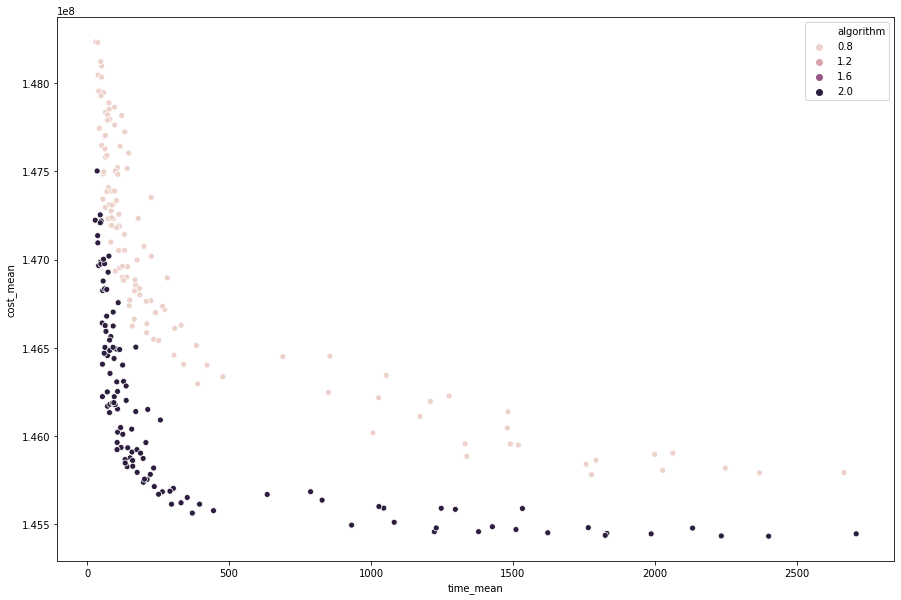

In [62]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(x="time_mean", y="cost_mean", hue="algorithm", data=stats)

In [41]:
"2.0 14867566.5 1000.0 30.0 0.99".split(" ")

['2.0', '14867566.5', '1000.0', '30.0', '0.99']

In [69]:
mask = (stats.time_mean > 900) & (stats.time_mean < 1000)
stats[mask].sort_values(by=["time_mean"], ascending=True)

,setting,time_mean,time_min,time_max,time_sd,time_median,cost_mean,cost_min,cost_max,cost_sd,cost_median
144,2.0 14867566.5 10000.0 15.0 0.99,931.570905,785.522113,1072.144521,86.951542,973.851667,145493866.7,145400229.0,145954550.0,107642.550118,145461080.0


algorithm	t0	tf	it	lambda

2	14867566.5	1000	30	0.99 best

1	14867566.5	100000	15	0.79 worst

1	49558555	1000	30	0.94 mid

2	14867566.5	10000	15	0.99 mid

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(x="time_mean", y="cost_mean", data=stats)